In [ ]:
# pip install ISLP

In [26]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , sklearn_sm)

import matplotlib.pyplot as plt

from sklearn.model_selection import (train_test_split, cross_validate,KFold,ShuffleSplit)
from sklearn.metrics import mean_squared_error as mse

# Validation Set Approch  

In [3]:
dataset = load_data('Auto')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
predictors = dataset.columns.drop(['mpg' , 'name'])
predictors

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [6]:
design = MS(predictors)
X = design.fit_transform(dataset)
X.head()

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,1.0,8,307.0,130,3504,12.0,70,1
1,1.0,8,350.0,165,3693,11.5,70,1
2,1.0,8,318.0,150,3436,11.0,70,1
3,1.0,8,304.0,150,3433,12.0,70,1
4,1.0,8,302.0,140,3449,10.5,70,1


In [8]:
y = dataset.mpg
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [11]:
X.shape , y.shape

((392, 8), (392,))

In [18]:
#split data
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((313, 8), (79, 8), (313,), (79,))

In [21]:
model = sm.OLS(y_train,X_train)
res = model.fit()
summarize(res)

,coef,std err,t,P>|t|
intercept,-18.4994,5.392,-3.431,0.001
cylinders,-0.3458,0.373,-0.928,0.354
displacement,0.0151,0.008,1.780,0.076
horsepower,-0.0213,0.016,-1.362,0.174
weight,-0.0061,0.001,-8.529,0.000
acceleration,0.0380,0.110,0.344,0.731
year,0.7677,0.059,12.958,0.000
origin,1.6135,0.312,5.175,0.000


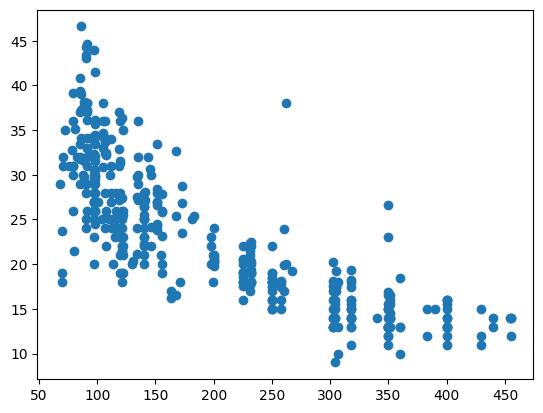

In [24]:
plt.scatter(X.displacement,y)

In [25]:
y_pred = res.predict(X_test)
y_pred

78     25.841562
274    26.036745
246    34.506018
55     24.895532
387    28.425987
         ...    
361    24.164562
82     24.063693
114    14.015525
3      14.858753
18     25.759440
Length: 79, dtype: float64

In [28]:
mse(y_test,y_pred).round(2)

10.71

# K fold cross validation appproch

In [30]:
kf_model = sklearn_sm(sm.OLS) # create a blank model to get it ready for seperate copies
cv = KFold(n_splits=5 , shuffle=True , random_state=42)
res_kf = cross_validate(kf_model, X, y, cv=cv) #train and validate the model

In [33]:
res_kf

{'fit_time': array([0.00232649, 0.00147557, 0.00155926, 0.00143671, 0.00163937]),
 'score_time': array([0.00084519, 0.00096202, 0.0009203 , 0.00085449, 0.0011394 ]),
 'test_score': array([10.71086442, 10.23121179, 15.42421381, 12.09887322,  9.01054167])}

In [34]:
np.mean(res_kf['test_score'] )

11.495140982367108